# Task 4: Insights and Recommendations
## Customer Experience Analysis for Ethiopian Banks

In this notebook, we analyze the cleaned mobile banking app reviews (Task 2) to:
- Identify **key drivers** and **pain points** for each bank
- Compare banks on sentiment and themes
- Visualize findings with charts and word clouds
- Provide **actionable recommendations** to improve apps

We use the CSV generated in Task 2: `sentiment_themes_lda.csv`.


## Load the Data

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load Task 2 results
df = pd.read_csv(r"C:\KAIM\week-2\bank-app-review-analysis\data\sentiment_themes_lda.csv")

# Preview the dataset
df.head()


,bank_name,review,rating,date,source,sentiment_label,sentiment_score,clean_review,lda_topic,theme_name
0,CBE,it's special for me,5,2025-11-29,Google Play,positive,0.4019,its special for me,0,App Updates & Reliability
1,CBE,This application is very important and advanta...,5,2025-11-27,Google Play,positive,0.5198,this application is very important and advanta...,2,User Experience / Usability
2,CBE,why didn't work this app?,1,2025-11-27,Google Play,neutral,0.0000,why didnt work this app,4,Performance Issues / Pain Points
3,CBE,The app makes our life easier. Thank you CBE!,5,2025-11-27,Google Play,positive,0.6800,the app makes our life easier thank you cbe,0,App Updates & Reliability
4,CBE,this app very bad 👎,1,2025-11-27,Google Play,negative,-0.5849,this app very bad 👎,1,Transactions & Account Functionality


## Sentiment Analysis Overview

We analyze the VADER sentiment scores and labels to understand overall user satisfaction per bank.


C:\Users\HP\AppData\Local\Temp\ipykernel_7524\2430698856.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bank_name', y='sentiment_score', data=df, palette='Set2')


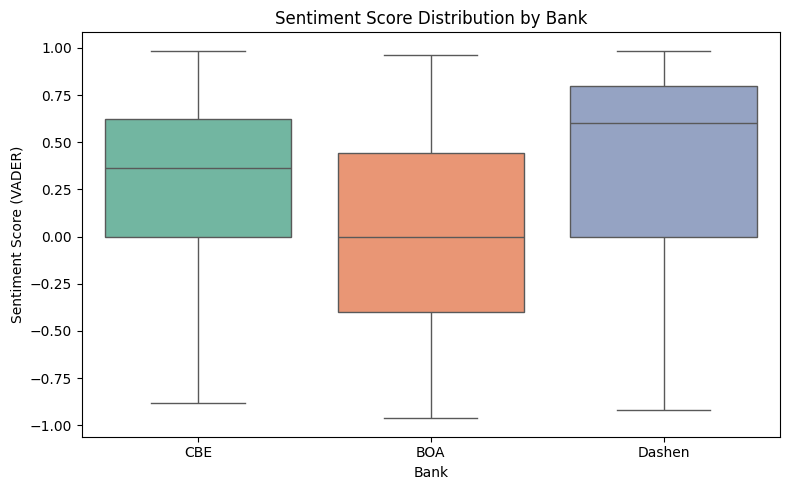

C:\Users\HP\AppData\Local\Temp\ipykernel_7524\2430698856.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, palette='Set2')


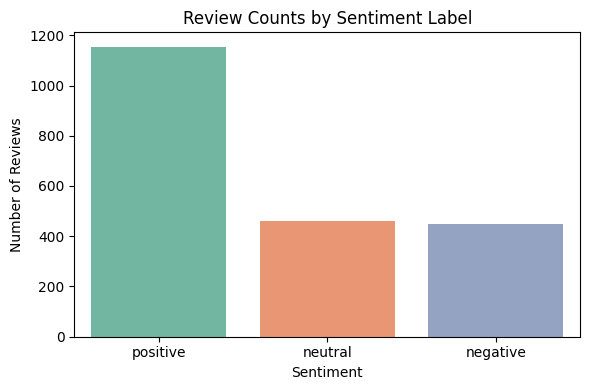

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(x='bank_name', y='sentiment_score', data=df, palette='Set2')
plt.title("Sentiment Score Distribution by Bank")
plt.ylabel("Sentiment Score (VADER)")
plt.xlabel("Bank")
plt.tight_layout()
plt.show()

# Optional: sentiment label counts
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment_label', data=df, palette='Set2')
plt.title("Review Counts by Sentiment Label")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()


## Theme Distribution

We examine which themes are most frequently mentioned per bank. 
This helps identify **drivers** (positive themes) and **pain points** (negative themes).


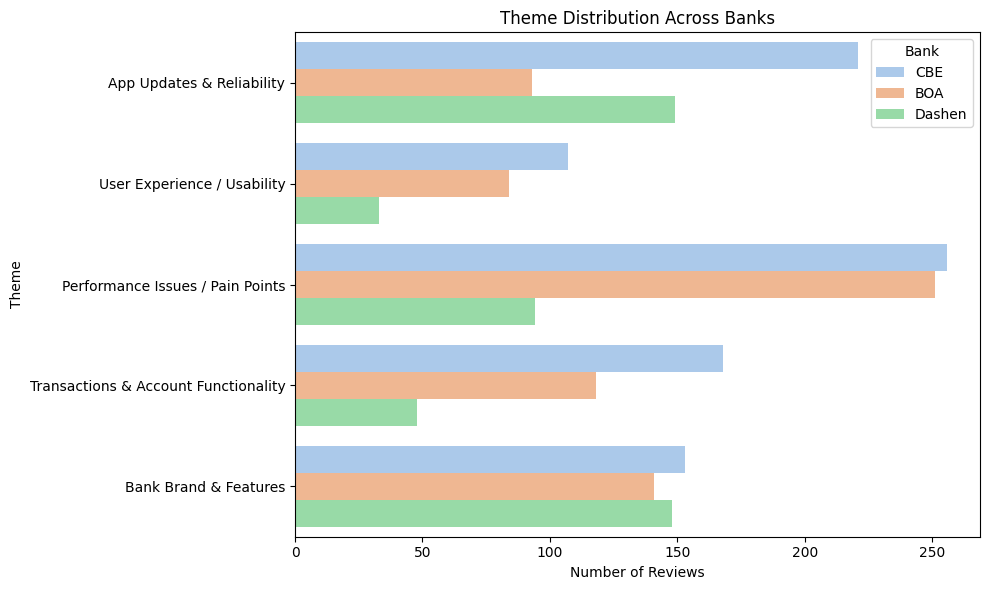

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(y='theme_name', hue='bank_name', data=df, palette='pastel')
plt.title("Theme Distribution Across Banks")
plt.xlabel("Number of Reviews")
plt.ylabel("Theme")
plt.legend(title="Bank")
plt.tight_layout()
plt.show()


## Word Clouds

Visualize the most frequent words in reviews for each bank.


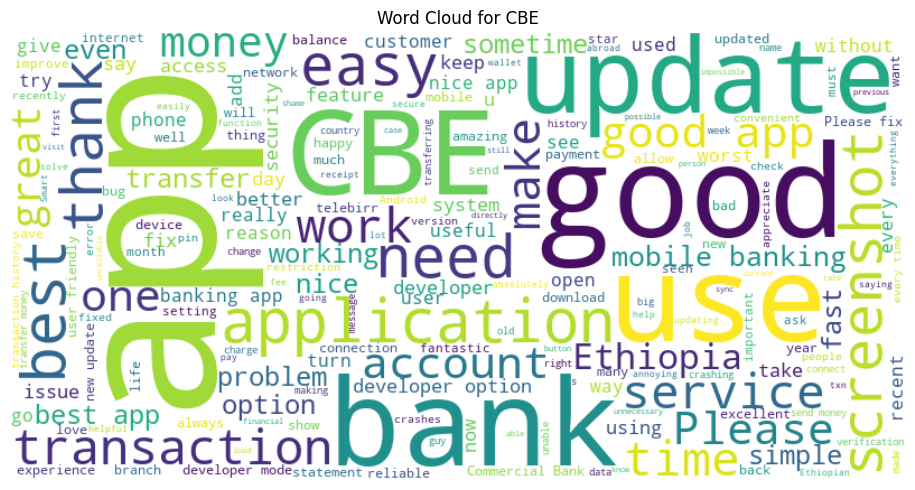

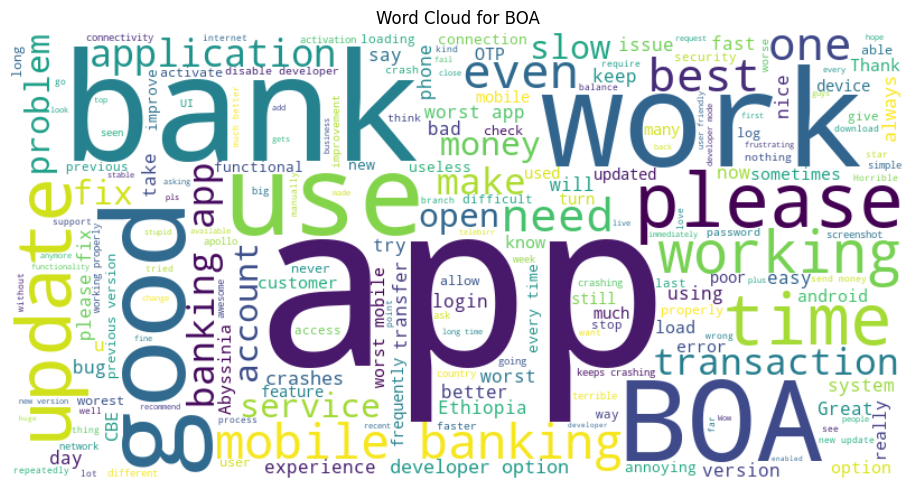

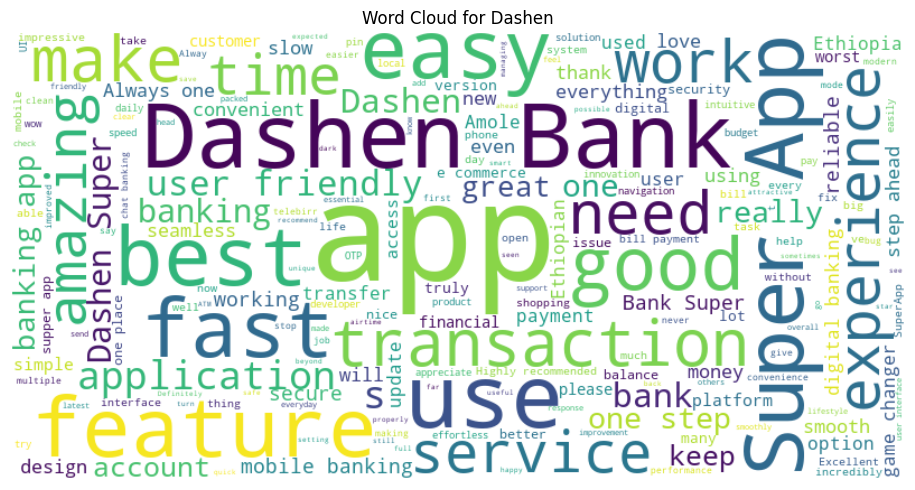

In [12]:
from wordcloud import WordCloud

for bank in df['bank_name'].unique():
    text = " ".join(df[df['bank_name'] == bank]['review'].astype(str))
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {bank}")
    plt.tight_layout()
    plt.show()


## Drivers and Pain Points per Bank

- **Driver** = theme with highest average sentiment score  
- **Pain Point** = theme with lowest average sentiment score


In [11]:
drivers_painpoints = {}

for bank in df['bank_name'].unique():
    subset = df[df['bank_name'] == bank]
    
    theme_sentiment = subset.groupby('theme_name')['sentiment_score'].mean().sort_values(ascending=False)
    
    driver = theme_sentiment.idxmax()
    pain_point = theme_sentiment.idxmin()
    
    drivers_painpoints[bank] = {
        "driver": driver,
        "pain_point": pain_point,
        "theme_sentiment": theme_sentiment
    }

# Display results
for bank, info in drivers_painpoints.items():
    print(f"\n{bank}:")
    print(f"  Driver: {info['driver']} (avg sentiment: {info['theme_sentiment'][info['driver']]:.2f})")
    print(f"  Pain Point: {info['pain_point']} (avg sentiment: {info['theme_sentiment'][info['pain_point']]:.2f})")



CBE:
  Driver: App Updates & Reliability (avg sentiment: 0.50)
  Pain Point: User Experience / Usability (avg sentiment: 0.04)

BOA:
  Driver: App Updates & Reliability (avg sentiment: 0.36)
  Pain Point: Performance Issues / Pain Points (avg sentiment: -0.08)

Dashen:
  Driver: App Updates & Reliability (avg sentiment: 0.56)
  Pain Point: User Experience / Usability (avg sentiment: 0.19)


## Practical Recommendations

####  Commercial Bank of Ethiopia (CBE)

 Driver: App Updates & Reliability (avg sentiment: 0.50)
  Recommendation:

   Maintain current update schedule and reliability standards.
   Continue testing new releases before deployment to avoid introducing bugs.
   Add a “what’s new” section in the app to highlight improvements for users.

 Pain Point: User Experience / Usability (avg sentiment: 0.04)
  Recommendation:

   Improve navigation and design consistency (e.g., easier transfers, clearer buttons).
   Simplify flows for frequent tasks like checking balances or transferring money.
   Conduct usability testing to identify confusing steps and improve intuitiveness.


####  Bank of Abyssinia (BOA)

 Driver: App Updates & Reliability (avg sentiment: 0.36)
  Recommendation:

   Continue improving app stability and reducing update-related issues.
   Communicate clearly with users about updates to reduce confusion or app downtime.

 Pain Point: Performance Issues / Pain Points (avg sentiment: -0.08)
  Recommendation:

   Optimize app speed, especially during transfers or login.
   Reduce app crashes and errors by improving backend stability.
   Implement monitoring tools to detect and fix issues quickly.



####  Dashen Bank

 Driver: App Updates & Reliability (avg sentiment: 0.56)
  Recommendation:

   Keep up strong update reliability practices.
   Highlight new features in updates to encourage engagement.

 Pain Point: User Experience / Usability (avg sentiment: 0.19)
  Recommendation:

   Simplify app workflows to make it easier for users to perform key actions.
   Improve layout, buttons, and feedback messages to enhance overall usability.
   Consider adding tutorials or guided walkthroughs for new users.